Importing the Dependencies

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection & Analysis

In [146]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('/content/upcoming Salary prediction 1 - Salary prediction .csv')

In [147]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,years,Mknowledge,Education,Salary
0,19,female,27.900,0,yes,Engineering,1000289.0
1,18,male,33.770,1,yes,Engineering,1000289.0
2,28,male,33.000,7,yes,MBA,2500000.0
3,33,male,22.705,7,yes,MBA,2500000.0
4,32,male,28.880,7,yes,MBA,2500000.0


In [149]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [150]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   sex         1338 non-null   object 
 2   bmi         1338 non-null   float64
 3   years       1338 non-null   int64  
 4   Mknowledge  1338 non-null   object 
 5   Education   1338 non-null   object 
 6   Salary      1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
- Sex
- Smoker
- Region

In [151]:
# checking for missing values
insurance_dataset.isnull().sum()

age           0
sex           0
bmi           0
years         0
Mknowledge    0
Education     0
Salary        0
dtype: int64

Data Analysis

In [152]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,years,Salary
count,1338.000000,1338.000000,1338.000000,1.338000e+03
mean,39.207025,30.663397,8.713752,1.115551e+06
std,14.049960,6.098187,2.921993,8.664520e+05
min,18.000000,15.960000,0.000000,1.163463e+03
25%,27.000000,26.296250,7.000000,4.000000e+05
50%,39.000000,30.400000,8.000000,7.002390e+05
75%,51.000000,34.693750,9.000000,1.600000e+06
max,64.000000,53.130000,16.000000,2.500000e+06


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


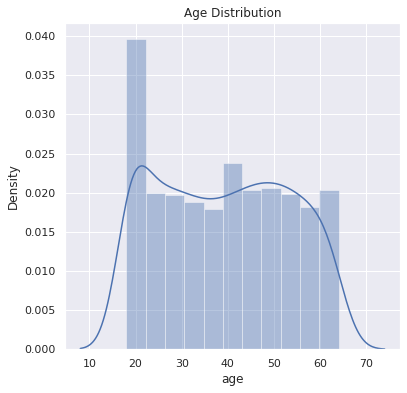

In [153]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

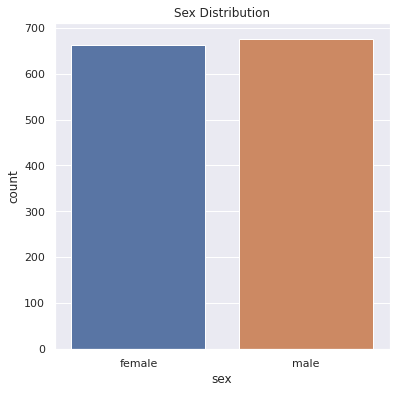

In [154]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [155]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


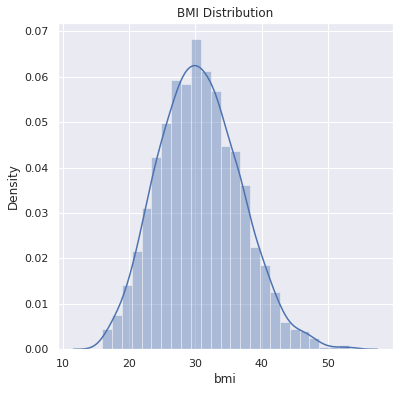

In [156]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

In [157]:
insurance_dataset['years'].value_counts()

9     463
7     314
8     220
5     129
16    104
15     33
14     14
11     13
10     13
12     10
13     10
0       8
2       4
1       3
Name: years, dtype: int64

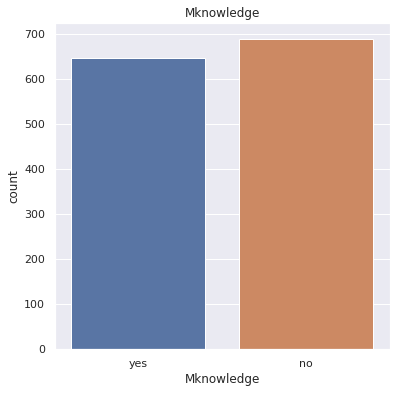

In [158]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='Mknowledge', data=insurance_dataset)
plt.title('Mknowledge')
plt.show()

In [159]:
insurance_dataset['Mknowledge'].value_counts()

no     690
yes    648
Name: Mknowledge, dtype: int64

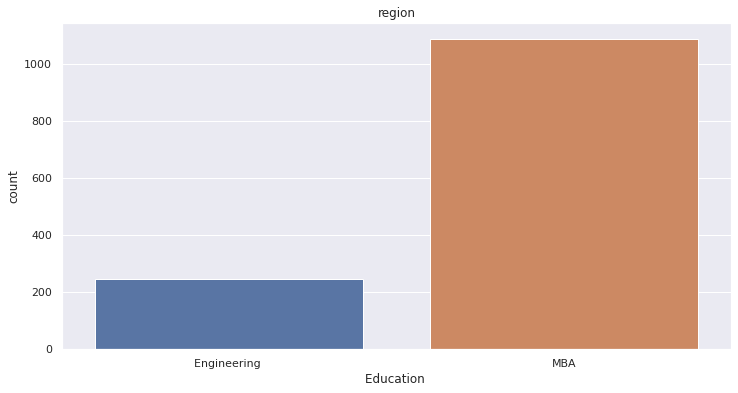

In [160]:
# region column
plt.figure(figsize=(12,6))
sns.countplot(x ='Education ', data=insurance_dataset)
plt.title('region')
plt.show()

In [161]:
insurance_dataset['Education '].value_counts()

MBA             1090
Engineering      248
Name: Education , dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


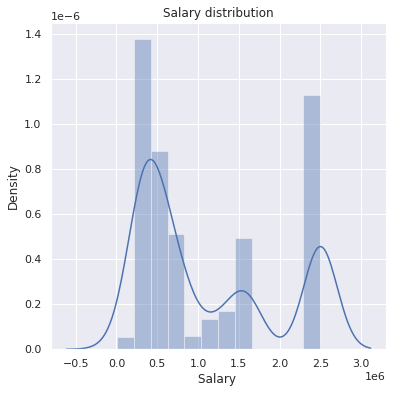

In [163]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['Salary '])
plt.title('Salary distribution')
plt.show()

Data Pre-Processing

Encoding the categorical features

In [164]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_dataset.replace({'Mknowledge':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'Education ':{'Engineering ':0,'MBA':1,}}, inplace=True)

Splitting the Features and Target

In [165]:
X = insurance_dataset.drop(columns='Salary ', axis=1)
Y = insurance_dataset['Salary ']

In [166]:
M = insurance_dataset['Mknowledge']

In [167]:
print(M)

0       0
1       0
2       0
3       0
4       0
       ..
1333    0
1334    1
1335    1
1336    1
1337    0
Name: Mknowledge, Length: 1338, dtype: int64


In [168]:
K = insurance_dataset['Education ']

In [169]:
print(K)

0       0
1       0
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    1
Name: Education , Length: 1338, dtype: int64


In [170]:
insurance_dataset.head()

,age,sex,bmi,years,Mknowledge,Education,Salary
0,19,1,27.900,0,0,0,1000289.0
1,18,0,33.770,1,0,0,1000289.0
2,28,0,33.000,7,0,1,2500000.0
3,33,0,22.705,7,0,1,2500000.0
4,32,0,28.880,7,0,1,2500000.0


In [171]:
print(X)

      age  sex     bmi  years  Mknowledge  Education 
0      19    1  27.900      0           0           0
1      18    0  33.770      1           0           0
2      28    0  33.000      7           0           1
3      33    0  22.705      7           0           1
4      32    0  28.880      7           0           1
...   ...  ...     ...    ...         ...         ...
1333   50    0  30.970      9           0           1
1334   18    1  31.920      9           1           0
1335   18    1  36.850      9           1           0
1336   21    1  25.800      9           1           0
1337   61    1  29.070      9           0           1

[1338 rows x 6 columns]


In [172]:
print(Y)

0       1.000289e+06
1       1.000289e+06
2       2.500000e+06
3       2.500000e+06
4       2.500000e+06
            ...     
1333    3.000000e+05
1334    2.205981e+03
1335    1.629833e+03
1336    2.007945e+03
1337    3.000000e+05
Name: Salary , Length: 1338, dtype: float64


Splitting the data into Training data & Testing Data

In [173]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [174]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [175]:
# loading the Linear Regression model
regressor = LinearRegression()

In [176]:
regressor.fit ( X_train, Y_train)

LinearRegression()

Model Evaluation

In [177]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [178]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.15904048589672704


In [179]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [180]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.2850325801475868


Building a Predictive System

In [183]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('Your Salary will be ', prediction[0])

[1127718.01530952]
Your Salary will be  1127718.0153095198


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
